# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [3]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.909):
{'logistic__alpha': 0.01, 'pca__n_components': 30}


In [5]:
search.best_estimator_.named_steps['pca']

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.101876,0.008191,0.000811,0.000059,0.0001,4,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.686111,0.569444,0.676880,0.724234,0.651811,0.661696,0.051664,14
1,0.083060,0.011627,0.000766,0.000058,0.0001,10,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.888889,0.841667,0.899721,0.913649,0.855153,0.879816,0.027155,12
2,0.113427,0.012114,0.000903,0.000093,0.0001,20,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.919444,0.866667,0.896936,0.935933,0.888579,0.901512,0.024120,9
3,0.135203,0.013127,0.000849,0.000036,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.925000,0.869444,0.910864,0.958217,0.874652,0.907635,0.032915,3
4,0.160564,0.010760,0.000956,0.000027,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.905556,0.869444,0.927577,0.949861,0.885794,0.907646,0.028707,2
5,0.197211,0.027696,0.001022,0.000034,0.0001,50,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.897222,0.852778,0.930362,0.947075,0.863510,0.898189,0.036581,10
6,0.213395,0.006665,0.001661,0.001241,0.0001,64,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.905556,0.850000,0.930362,0.961003,0.874652,0.904314,0.039303,7
7,0.132667,0.016027,0.001176,0.000447,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.780556,0.741667,0.779944,0.785515,0.743733,0.766283,0.019363,13
8,0.121415,0.010176,0.000846,0.000085,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.905556,0.858333,0.888579,0.916435,0.838440,0.881469,0.029121,11
9,0.183376,0.028838,0.000965,0.000030,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.925000,0.880556,0.896936,0.947075,0.883008,0.906515,0.025710,5


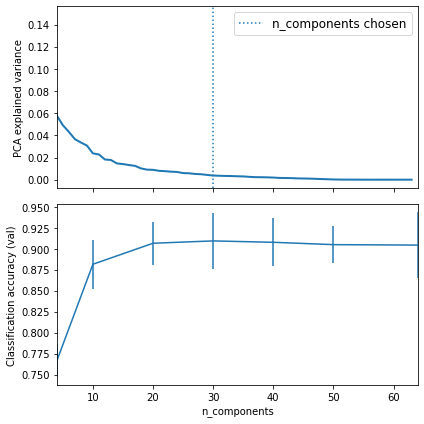

In [7]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# 繪製不同採樣點的分類正確率
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()